In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2

In [2]:
data_dir = "E:/Projects/2020/OCR/EAST/data"

In [49]:
img_path = [p for p in os.listdir(data_dir) if p.endswith(".jpg")]
label_path = [p for p in os.listdir(data_dir) if p.endswith(".txt")]

In [13]:
file_ =  open(os.path.join(data_dir, label_path[0])).readlines()
img =  Image.open(os.path.join(data_dir, img_path[0]))


In [15]:
a = file_[0].strip().split(',')

In [22]:
x = []
y = []

for i, p in enumerate(a[:-1]):
    
    if i%2 == 0:
        x.append(int(p))
    else:
        y.append(int(p))
    

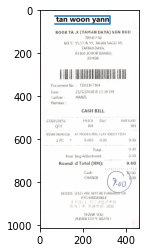

In [27]:
plt.imshow(img)
plt.plot(x, y)

In [32]:
data = {"img": img_path, "path":label_path }

In [72]:
img_path = []
file_path = []
img_name = []
file_name = []

j = 0
for i, path in enumerate(os.listdir(data_dir)):
    if path.endswith(".jpg"):
        img_ = path[:-4] + ".txt"

        if os.path.exists(os.path.join(data_dir, img_)):
            file_name.append(path)
            img_name.append(img_)
            img_path.append(os.path.normpath(os.path.join(data_dir, img_)))
            file_path.append(os.path.normpath(os.path.join(data_dir, path)))

        else:
            print(img_)


X51005433492(1).txt
X51005442384(1).txt
X51005605333(1).txt
X51005676539(1).txt
X51005685355(2).txt
X51005685357(2).txt
X51007339118(1).txt
X51007339647(1).txt


In [65]:
#move label and image to seperate folder
image_folder = os.path.join(data_dir, "images")
label_folder = os.path.join(data_dir, "labels")

os.makedirs(image_folder)
os.makedirs(label_folder)

In [73]:
for img, i_path, file_, f_path in zip(img_name, img_path, file_name, file_path):
    shutil.move(i_path, os.path.join(image_folder, img))
    shutil.move(f_path, os.path.join(label_folder, file_)) 

In [3]:
#Processed data visualization
data_dir = os.path.join(data_dir, "processed_data")

image_files = [path for path in os.listdir(data_dir) if path.endswith("jpg")]


In [9]:
idx = np.random.choice(np.arange(len(image_files)), 5).tolist()

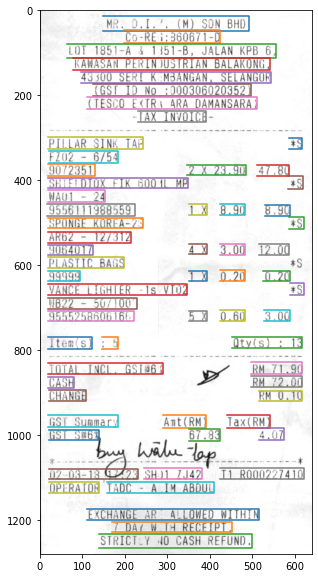

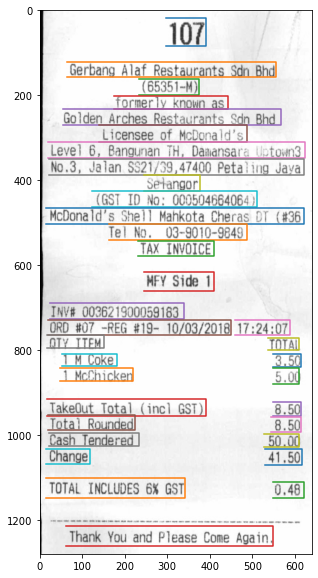

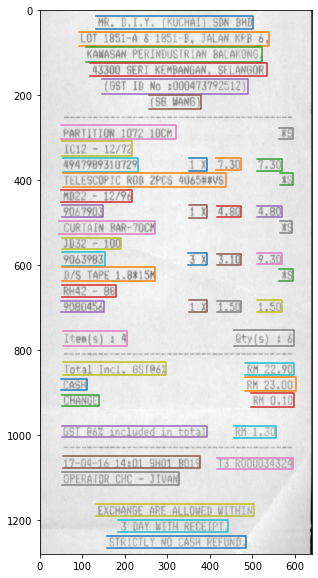

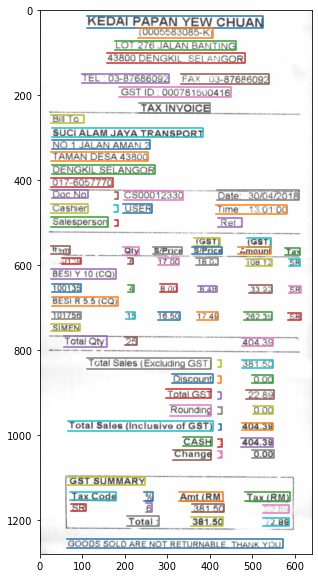

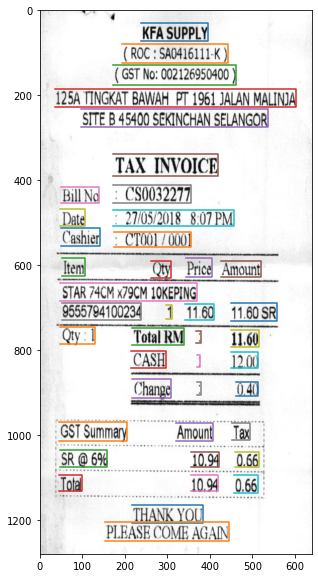

In [18]:
for id_ in idx:
    image_name = image_files[id_]

    image = cv2.imread(os.path.join(data_dir, image_name))
    label = open(os.path.join(data_dir, image_name[:-4] + ".json")).read()
    label = json.loads(label)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    for lab in label:
        plt.plot(lab["x"], lab["y"])
